## Семинар 2 "Распознавание рукописных цифр"

ФИО: Белозёров Михаил Сергеевич

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [1]:
class Linear:
    def __init__(self, input_size, output_size):
        '''
        Creates weights and biases for linear layer.
        Dimention of inputs is *input_size*, of output: *output_size*.
        '''
        self.weights=np.random.rand (output_size, input_size)
        self.weights=self.weights / 10
        self.biases=np.zeros(output_size)
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, input_size).
        Returns output of size (N, output_size).
        Hint: You may need to store X for backward pass
        '''
        self.X=X
        return X.dot(self.weights.T) + self.biases
    
    def forward_w(self, W):
        return self.X.dot(W.T) + self.biases
    
    def backward(self, dLdy):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        self.dLdw = np.dot(self.X.T, dLdy)
        return dLdy.dot(self.weights)
    
    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''
        self.weights = self.weights - learning_rate * self.dLdw.T
        
        
def sigma(x):
    return 1. / (1 + np.exp(-x))


class Sigmoid:
    def __init__(self):
        pass
        
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = X
        return sigma(self.X)
        
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        sigmoid_d = sigma(self.X) - np.power (sigma(self.X),2 )

        return np.multiply(dLdy, sigmoid_d)
    
    def step(self, learning_rate):
        pass
    
import sklearn.preprocessing
def binarizer (Y):
    label_binarizer = sklearn.preprocessing.LabelBinarizer()
    label_binarizer.fit(range(ClassNum))
    ret = label_binarizer.transform(Y)
    return ret
    return ret[:,:ret.shape[1] - 1]


class NLLLoss:
    def init(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        pass
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, C), where C is the number of classes
        y is np.array of size (N), contains correct labels
        '''
        self.bin = binarizer(y)
        log_max = np.amax(X, 1)
        summ = (X.T - log_max.T).T
        logg = np.log(np.sum(np.exp(summ), axis=1))
        summm = (logg.T + log_max.T).T        
        self.p = np.exp((X.T - summm.T).T)
        
        return self.p
    
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        return self.p - self.bin
    
class NeuralNetwork:
    def __init__(self, modules):
        '''
        Constructs network with *modules* as its layers
        '''
        self.modules = modules
    
    def forward(self, X):
        res = X
        for l in self.modules:
            res = l.forward (res)
        return res
    
    def backward(self, dLdy):
        '''
        dLdy here is a gradient from loss function
        '''
        newd = dLdy
        for l in reversed (self.modules):
            newd = l.backward (newd)
        return newd
    
    def step(self, learning_rate):
        for l in self.modules:
            l.step (learning_rate)
        pass

In [2]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
import torch
%matplotlib inline

In [3]:
to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [4]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.size(0), -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    pass

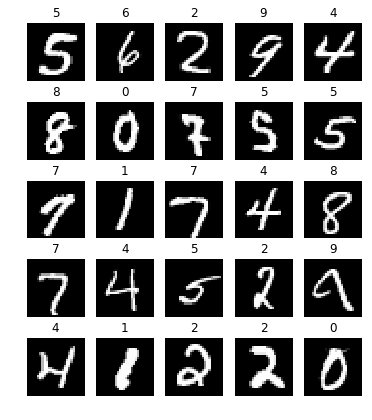

In [5]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [6]:
import sys
from tqdm import *
from sklearn.metrics import log_loss

In [7]:
ClassNum = 10
def run_test (train_loader, nn):
    ClassNum=10
    error = []
    x_error = []


    prev = 10
    it = 0
    for epoch in trange (10, desc='Epoch'):
        for X, y in train_loader:
            X = X.view(X.size(0), -1)
            X = X.numpy() ### Converts torch.Tensor to numpy array
            y = y.numpy()
            bina = binarizer (y)
            res = nn.forward (X)
            result_io = loss.forward(res, y)
            error.append (log_loss(y, result_io, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
#             sys.stdout.write (('\r {} {}').format (epoch, error[-1]))
            nn.backward (loss.backward ())
            nn.step (l_r)
    
    print ("minimum loss: ", min(error))
    plt.figure (figsize=(15,5))
    plt.plot (error)
    plt.show ()
    
    error = []
    for X, y in test_loader:
        X = X.view(X.size(0), -1)
        X = X.numpy() ### Converts torch.Tensor to numpy array
        y = y.numpy()
        bina = binarizer (y)
        res = nn.forward (X)
        result_io = loss.forward(res, y)
        error.append (log_loss(y, result_io, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

    print ("max error: ", max(error))
    print ("mean error: ", np.array(error).mean ())


    plt.figure (figsize=(15,5))
    plt.hist (error, bins=1000, log=True)
    plt.show ()


Epoch: 100%|██████████| 10/10 [01:11<00:00,  7.20s/it]

('minimum loss: ', 0.0054042711941339949)


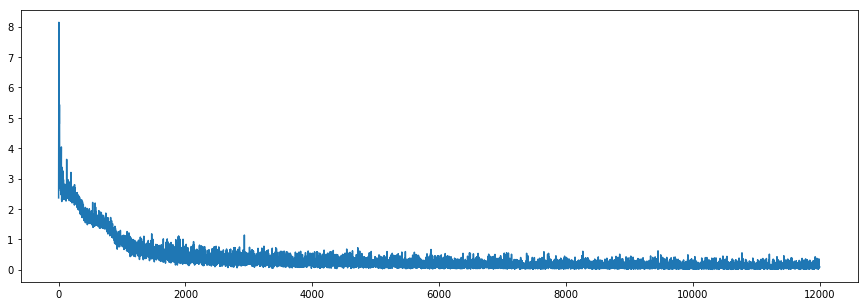

('max error: ', 14.017094395930798)
('mean error: ', 0.15538843777146302)


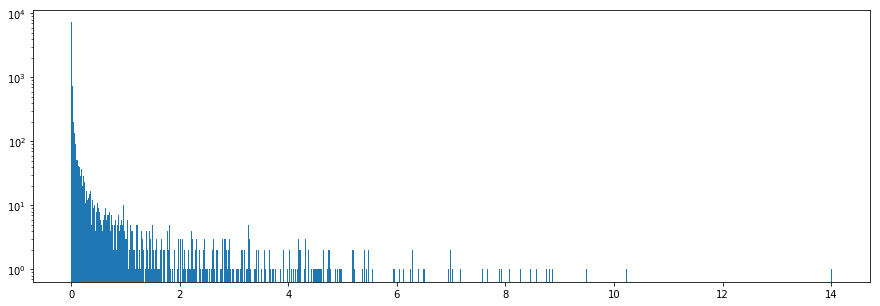

In [8]:
layers = []

layers.append (Linear(784,100))
layers.append (Sigmoid ())
layers.append (Linear(100,100))
layers.append (Sigmoid ())
layers.append (Linear(100,10))

loss = NLLLoss()
l_r = 0.01

nn = NeuralNetwork (layers)
run_test (train_loader, nn)

### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

### ReLU

In [9]:
def check_gradient(func, X, gradient):
    '''
    Computes numerical gradient and compares it with analytcal.
    func: callable, function of which gradient we are interested. Example call: func(X)
    X: np.array of size (n x m)
    gradient: np.array of size (n x m)
    Returns: maximum absolute diviation between numerical gradient and analytical.
    '''
    abs_max = 0
    eps = 1e-6

    gr = np.empty(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x_r = X.copy()
            x_l = X.copy()
            
            x_r[i][j] = X[i][j] + eps
            x_l[i][j] = X[i][j] - eps
#             print ("real grad: ", gradient[i][j], "we assume: ",(func(x_r) - func(x_l)).sum () / (2 * eps))             
            gr[i][j] = (func(x_r) - func(x_l)).sum () / (2 * eps) - gradient[i][j]       
    
    return gr.max()

In [10]:
class ReLU:
    def __init__(self):
        pass
        
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = np.clip (X, 0, None)
        return np.clip (X, 0, None)
        
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return np.multiply(dLdy, np.clip (np.ceil (self.X),0,1))
    
    def step(self, learning_rate):
        pass

In [11]:
input_size = 100
sigm_layer = ReLU()
N = 1000
X = np.random.rand(N, input_size)
sigm_layer.forward(X)
print ('dLdx check: ', check_gradient(sigm_layer.forward, X, sigm_layer.backward(np.ones((N, input_size)))))

('dLdx check: ', 2.8755664516211255e-11)


Epoch: 100%|██████████| 10/10 [01:07<00:00,  6.75s/it]

('minimum loss: ', 0.11537902590972011)


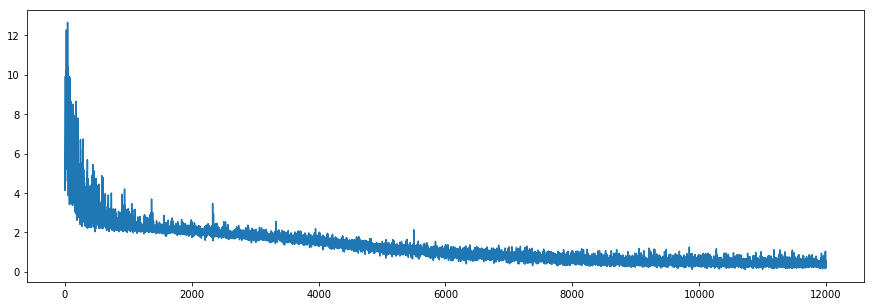

('max error: ', 18.104540393313023)
('mean error: ', 0.4013789729039286)


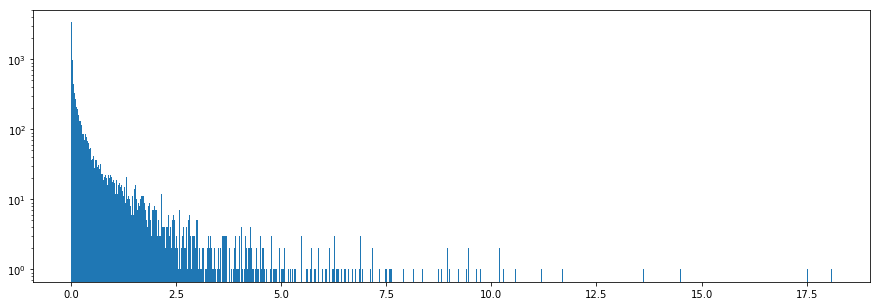

In [12]:
layers = []

layers.append (Linear(784,100))
layers.append (ReLU ())
layers.append (Linear(100,100))
layers.append (ReLU ())
layers.append (Linear(100,10))

loss = NLLLoss()
l_r = 0.00005

nn = NeuralNetwork (layers)
run_test (train_loader, nn)

### ELU

In [13]:
def down_elu(a, x):
    return a * (np.exp(x) - 1)
def back_down_elu (a, x):
    return a * np.exp (x)


class ELU:
    def __init__(self, a):
        self.a = a
        pass
        
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = X
        return np.where (self.X > 0, self.X, self.a * (np.exp (self.X) - 1))
        
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        ret = np.where (self.X > 0, 1 , self.a * np.exp (self.X))                 
        return np.multiply (dLdy, ret)
    
    def step(self, learning_rate):
        pass

In [14]:
input_size = 10
sigm_layer = ELU(1)
N = 5
X = np.random.rand(N, input_size) - 0.5
sigm_layer.forward(X)
print ('dLdx check: ', check_gradient(sigm_layer.forward, X, sigm_layer.backward(np.ones((N, input_size)))))

('dLdx check: ', 5.1695869807133477e-11)


Epoch: 100%|██████████| 10/10 [01:10<00:00,  7.01s/it]

('minimum loss: ', 0.064300307276971683)


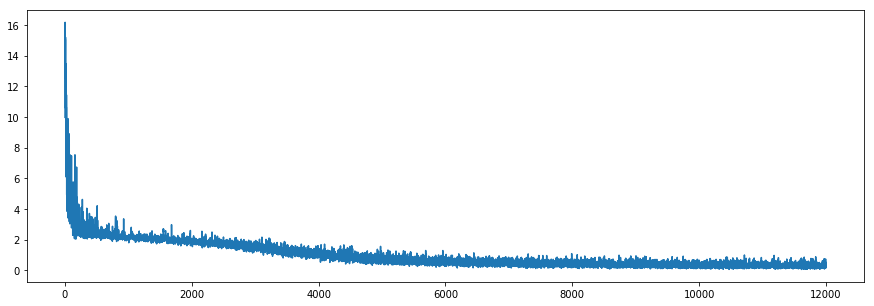

('max error: ', 17.495531830719347)
('mean error: ', 0.30471408841258862)


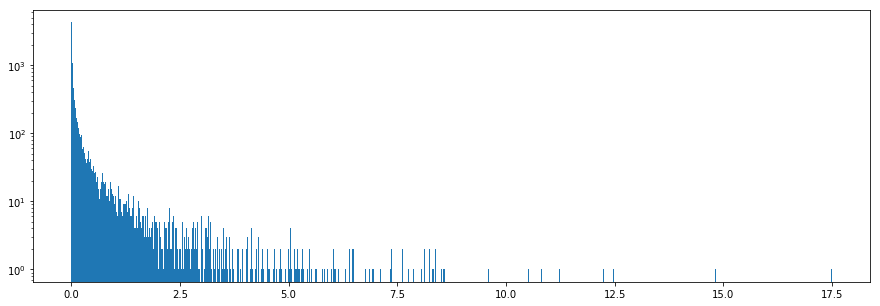

In [15]:
layers = []

layers.append (Linear(784,100))
layers.append (ELU (1))
layers.append (Linear(100,100))
layers.append (ELU (1))
layers.append (Linear(100,10))

loss = NLLLoss()
l_r = 0.0001

nn = NeuralNetwork (layers)
run_test (train_loader, nn)

### Часть 3: Предобработка данных

Посчитайте на всей обучающей выборке матрицу ковариации и среднее. Нормализуйте данные по схеме: вычесть среднее, декоррелировать, нормировать дисперсию. Сравните графики обучения на одной и той же архитектуре с и без предобработки.

In [16]:
from scipy.linalg import sqrtm

In [17]:
X_train = train_dataset.train_data.view(train_dataset.train_data.size(0), -1).numpy()*1.0
y_train = train_dataset.train_labels.numpy()


X_test = test_dataset.test_data.view(test_dataset.test_data.size(0), -1).numpy()*1.0
y_test = test_dataset.test_labels.numpy ()

In [18]:
mean = X_train.mean ()

X_train =X_train - mean
X_test = X_test - mean

In [19]:
cov = X_train.T.dot(X_train) / len (X_train)

In [20]:
cov = cov + np.eye(len(cov))*1e-2

In [21]:
X_train = X_train.dot(np.linalg.inv(sqrtm(cov))).real
X_test = X_test.dot(np.linalg.inv(sqrtm(cov))).real

In [22]:
from torch.utils.data import DataLoader, Dataset

In [23]:
class dataset_try(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [24]:
d = dataset_try (X_train.real, y_train)
new_data_loader = DataLoader (d, batch_size=200, shuffle=True)

d_test = dataset_try (X_test.real, y_test)
new_test_loader = DataLoader (d, batch_size=1000)

In [25]:
try:
    import IPython
    clear_output = IPython.core.display.clear_output
except:
    IPython = None

In [26]:
from sklearn.metrics import log_loss
ClassNum = 10
def run_test_dec (cov, nn):
    ClassNum=10
    error = []
    x_error = []


    prev = 10
    it = 0
    for epoch in range (10):
        for batch, label in new_data_loader:
#             clear_output ()
            X = batch
            y = label
            X = X.numpy()
            y = y.numpy()
            bina = binarizer (y)
            res = nn.forward (X)
            result_io = loss.forward(res, y)
            error.append (log_loss(y, result_io, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
            sys.stdout.write(('\r {} {}').format (epoch, error[-1]))
            nn.backward (loss.backward ())
            nn.step (l_r)
                
    print ("minimum loss: ", min(error))
    plt.figure (figsize=(15,5))
    plt.plot (error)
    plt.show ()
    
    error = []
    for batch, label in new_test_loader:
        X = batch
        y = label
        X = X.numpy()
        y = y.numpy()
        bina = binarizer (y)
        res = nn.forward (X)
        result_io = loss.forward(res, y)
        error.append (log_loss(y, result_io, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

    print ("max loss: ", max (error))
    print ("mean error: ", np.array(error).mean ())


    plt.figure (figsize=(15,5))
    plt.hist (error, bins=1000, log=True)
    plt.show ()

 9 0.0495371915985('minimum loss: ', 0.0096173868449691505)


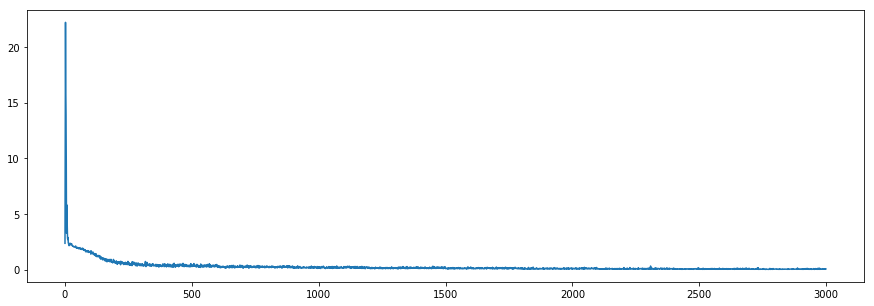

('max loss: ', 0.043489520940862197)
('mean error: ', 0.025519191076383986)


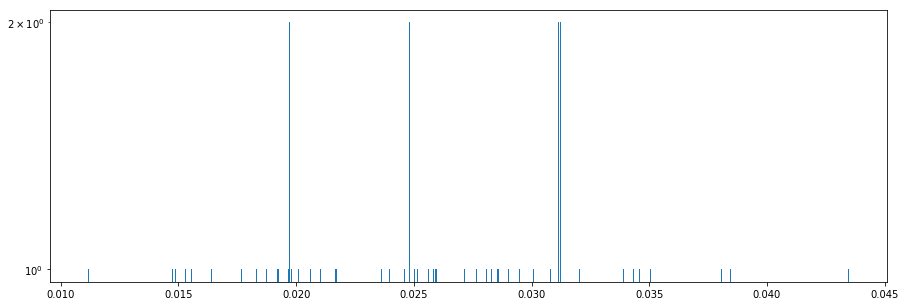

In [27]:
layers = []

layers.append (Linear(784,100))
layers.append (ELU (1))
layers.append (Linear(100,100))
layers.append (ELU (1))
layers.append (Linear(100,10))

loss = NLLLoss()
l_r = 0.001


nn = NeuralNetwork (layers)

run_test_dec (cov, nn)

### Часть 4: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?

хуже всех справился elu лучше всех - sigmoid

Данные прошедшие предобработку позволяют достичь намного лучшей точности